In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from datetime import datetime
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import re

In [3]:
sns.set_style("whitegrid")

In [4]:
df = pickle.load(open("df.pkl", 'rb'))

In [5]:
df.shape

(1127182, 35)

In [6]:
def get_bedrooms(housing):
    """parse amount of bedrooms from 'housing' field"""
    bedrooms = None
    # bedrooms
    match = re.search(r'(\d+)br.*', housing)
    if match:
        bedrooms = int(match.group(1))
    return bedrooms

In [7]:
df.dropna(subset=['parsed_price', "parsed_housing"], inplace=True)

In [8]:
df["price"] = df["parsed_price"].apply(float)

In [9]:
df['bedrooms'] = df["parsed_housing"].apply(get_bedrooms)

In [10]:
df.head()

,parsed_postingtitletext,parsed_map_address,added,PostUrl,PostTitle,parsed_price,parsed_price_text,parsed_housing,PostContent,parsed_data_longitude,...,parsed_wd,parsed_type,parsed_laundryb,parsed_nthumbs,parsed_garagea,parsed_laundrys,parsed_garaged,parsed_catsok,price,bedrooms
0,$3150 / 2br - 1300ft2 - Sunset Oaks Townhome- ...,1249 Crescent Terrace,1538706586266,https://sfbay.craigslist.org/sby/apa/d/sunset-...,simulated,3150,$3150,2br - 1300ft2,simulated,-122.026428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3150.0,2.0
1,$1769 / 2br - 875ft2 - ❄ Pittsburg Apartment L...,2205 E Leland Rd,1539451812116,https://sfbay.craigslist.org/eby/apa/d/pittsbu...,simulated,1769,$1769,2br - 875ft2,simulated,-121.864673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1769.0,2.0
2,$3000 / 2br - 1800ft2 - 2 Bedroom 1 Bath 1 Car...,375 Pope Street,1538947757137,https://sfbay.craigslist.org/sfc/apa/d/2-bedro...,simulated,3000,$3000,2br - 1800ft2,simulated,-122.439706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,2.0
3,$2150 / 3br - 1200ft2 - Updated 1200 SQ FT 3 B...,2436 Baltic Dr,1585287116209,https://sfbay.craigslist.org/eby/apa/d/fairfie...,simulated,2150,$2150,3br - 1200ft2,simulated,-122.019156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,3.0
4,$2150 / 1br - 726ft2 - FULLY RENOVATED 1BED 1B...,1182 E Street near 2nd,1587684611249,https://sfbay.craigslist.org/eby/apa/d/hayward...,simulated,2150,$2150,1br - 726ft2,simulated,-122.076737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,1.0


In [11]:
df.columns

Index(['parsed_postingtitletext', 'parsed_map_address', 'added', 'PostUrl',
       'PostTitle', 'parsed_price', 'parsed_price_text', 'parsed_housing',
       'PostContent', 'parsed_data_longitude', 'parsed_attrs',
       'parsed_district', 'parsed_map_link', 'parsed_postingbody',
       'parsed_page_head', 'parsed_thumbs', 'FeedTitle',
       'parsed_titletextonly', 'intid', 'parsed_data_latitude', 'FeedUrl',
       'PostPublished', 'parsed_notices', 'parsed_dogsok', 'parsed_area',
       'parsed_bedrooms', 'parsed_furnished', 'parsed_wd', 'parsed_type',
       'parsed_laundryb', 'parsed_nthumbs', 'parsed_garagea',
       'parsed_laundrys', 'parsed_garaged', 'parsed_catsok', 'price',
       'bedrooms'],
      dtype='object')

In [12]:
df.shape

(1065286, 37)

In [13]:
df.dropna(subset=["bedrooms"], inplace=True)

In [14]:
df.shape

(994349, 37)

In [15]:
pdf = df.loc[:, ["added", "price", "bedrooms", "parsed_district"]]

In [16]:
pdf.describe()

,price,bedrooms
count,9.943490e+05,994349.000000
mean,3.017049e+14,1.867184
std,3.008513e+17,0.957912
min,0.000000e+00,1.000000
25%,2.199000e+03,1.000000
50%,2.750000e+03,2.000000
75%,3.580000e+03,2.000000
max,3.000000e+20,123.000000


In [17]:
pdf["bedrooms"].unique()

array([  2.,   3.,   1.,   5.,   4.,   6.,   7.,   8., 123.])

In [18]:
def stodatetime(s):
    return datetime.utcfromtimestamp(int(s)/1000)

In [19]:
pdf.loc[:,"time"] = pdf["added"].apply(stodatetime)

In [20]:
pdf.describe()

,price,bedrooms
count,9.943490e+05,994349.000000
mean,3.017049e+14,1.867184
std,3.008513e+17,0.957912
min,0.000000e+00,1.000000
25%,2.199000e+03,1.000000
50%,2.750000e+03,2.000000
75%,3.580000e+03,2.000000
max,3.000000e+20,123.000000


In [21]:
now = datetime.utcnow()
def days_ago(t):
    delta = now - t
    return -1 * delta.days

def weeks_ago(t):
    return days_ago(t) // 7

In [22]:
pdf["days_ago"] = pdf["time"].apply(days_ago)

In [23]:
pdf["weeks_ago"] = pdf["time"].apply(weeks_ago)

In [24]:
pdf.describe()

,price,bedrooms,days_ago,weeks_ago
count,9.943490e+05,994349.000000,994349.000000,994349.000000
mean,3.017049e+14,1.867184,-278.822333,-40.260561
std,3.008513e+17,0.957912,234.998233,33.569317
min,0.000000e+00,1.000000,-830.000000,-119.000000
25%,2.199000e+03,1.000000,-357.000000,-51.000000
50%,2.750000e+03,2.000000,-204.000000,-30.000000
75%,3.580000e+03,2.000000,-105.000000,-15.000000
max,3.000000e+20,123.000000,0.000000,0.000000


In [25]:
pdf["price"].describe()

count    9.943490e+05
mean     3.017049e+14
std      3.008513e+17
min      0.000000e+00
25%      2.199000e+03
50%      2.750000e+03
75%      3.580000e+03
max      3.000000e+20
Name: price, dtype: float64

In [26]:
pdf.head()

,added,price,bedrooms,parsed_district,time,days_ago,weeks_ago
0,1538706586266,3150.0,2.0,sunnyvale,2018-10-05 02:29:46.266,-677,-97
1,1539451812116,1769.0,2.0,"Pittsburg, CA",2018-10-13 17:30:12.116,-668,-96
2,1538947757137,3000.0,2.0,excelsior / outer mission,2018-10-07 21:29:17.137,-674,-97
3,1585287116209,2150.0,3.0,fairfield / vacaville,2020-03-27 05:31:56.209,-138,-20
4,1587684611249,2150.0,1.0,hayward / castro valley,2020-04-23 23:30:11.249,-110,-16


In [27]:
pdf.loc[:,"bedrooms_str"] = pdf["bedrooms"].apply(lambda x: f"{int(x)}br")

In [28]:
pdf["bedrooms_str"]

0          2br
1          2br
2          2br
3          3br
4          1br
          ... 
1127177    1br
1127178    2br
1127179    2br
1127180    1br
1127181    1br
Name: bedrooms_str, Length: 994349, dtype: object

In [29]:
acc = pdf[(pdf["days_ago"] >- 300) & (pdf["price"] < 8000) & (pdf["bedrooms"] <= 3)]

In [30]:
acc.shape

(665753, 8)

In [31]:
acc.describe()

,price,bedrooms,days_ago,weeks_ago
count,665753.000000,665753.000000,665753.000000,665753.000000
mean,2875.793973,1.692635,-146.215218,-21.317107
std,1072.021557,0.708608,82.784105,11.824642
min,0.000000,1.000000,-287.000000,-41.000000
25%,2175.000000,1.000000,-218.000000,-32.000000
50%,2695.000000,2.000000,-147.000000,-21.000000
75%,3400.000000,2.000000,-76.000000,-11.000000
max,7999.000000,3.000000,0.000000,0.000000


In [32]:
acc["bedrooms_str"].unique()

array(['3br', '1br', '2br'], dtype=object)

In [33]:
#g = sns.relplot(x="days_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=acc);
#g.fig.set_figwidth(12)
#g.fig.set_figheight(5)

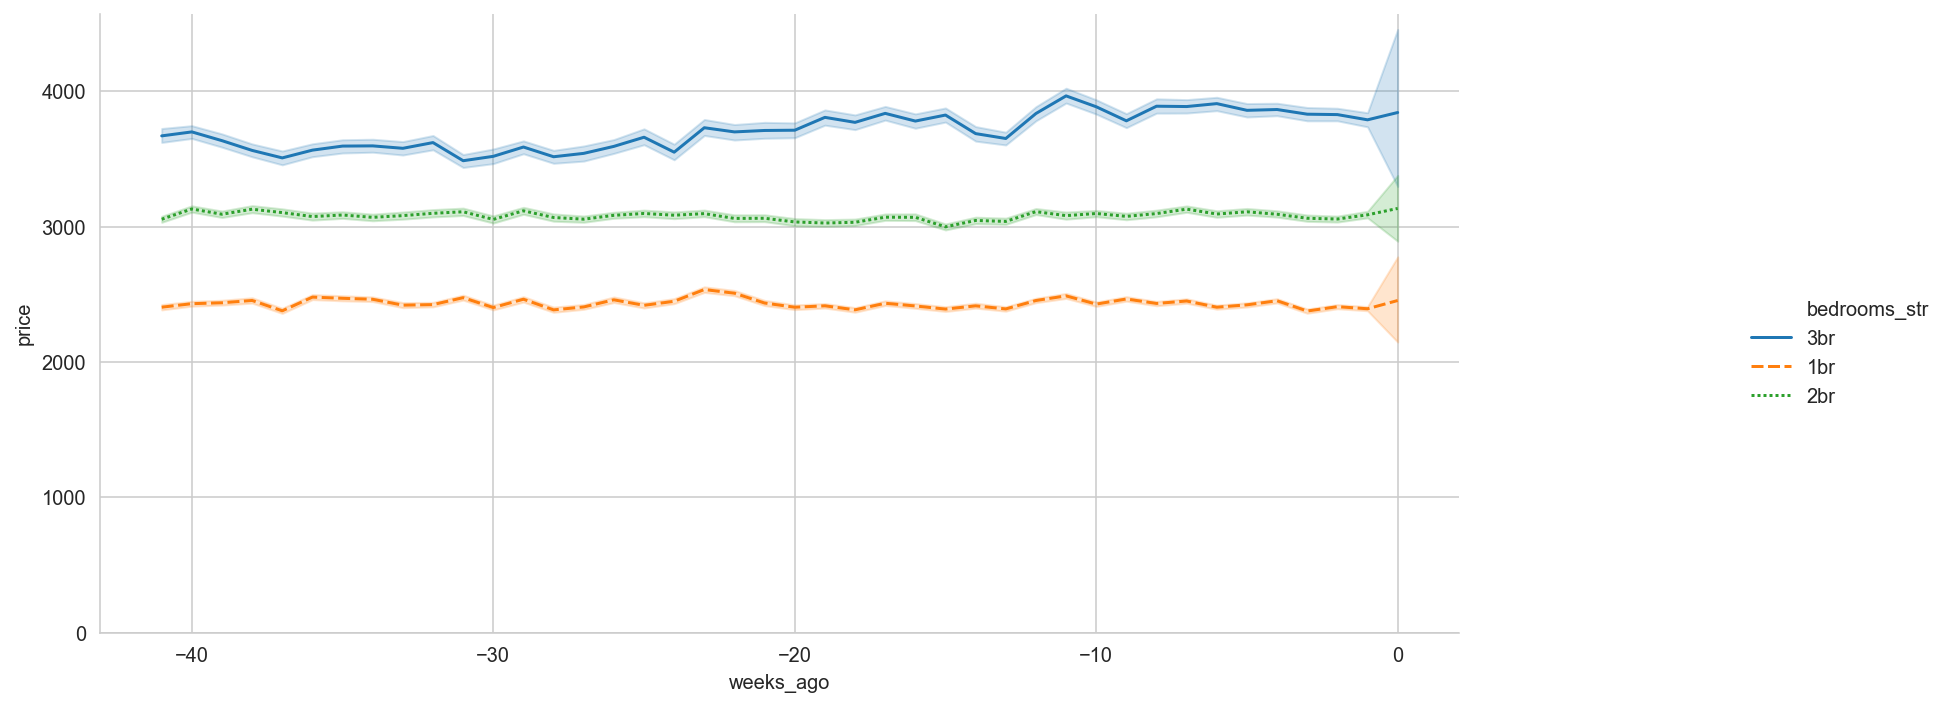

In [34]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=acc);
g.fig.set_figwidth(15);
g.fig.set_figheight(5);
g.set(ylim=(0, None));

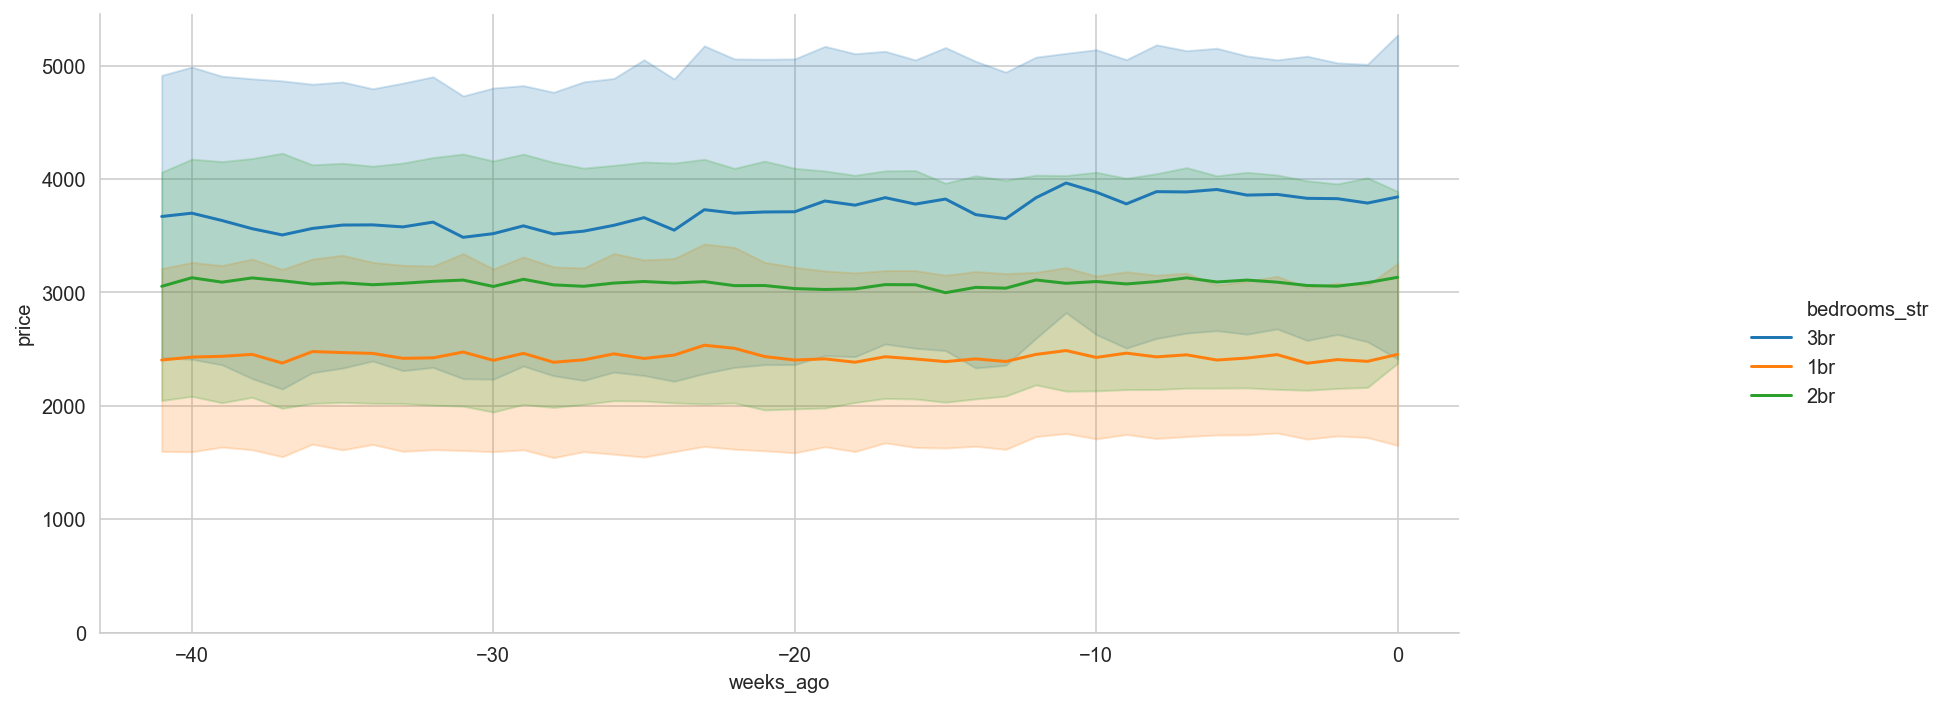

In [35]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", data=acc)
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));

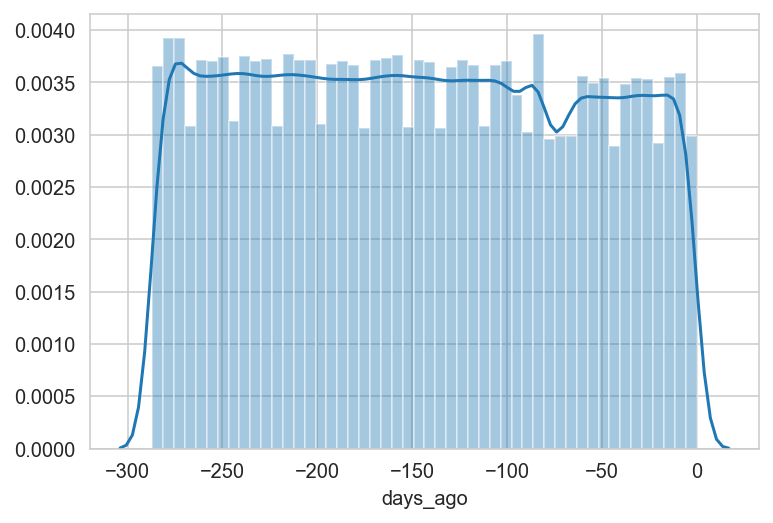

In [36]:
sns.distplot(acc["days_ago"])

In [37]:
acc["parsed_district"].describe()

count       650743
unique        2693
top       berkeley
freq         23662
Name: parsed_district, dtype: object

In [ ]:
plt.rcParams['figure.figsize'] = [15, 6]
g = sns.catplot(x="bedrooms_str", y="price", kind="swarm", data=acc);
g.set_xticklabels(rotation=90)

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(acc["price"]);

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(df["price"]);